In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd

<h1>Caso 1</h1>

In [270]:
def fR(x):
    VTH=0.75 #Volteje Umbral
    RON=115 #Resistencia del Transistor NPN BJT Q Ohms
    if (x<VTH):
        i=0
    else:
        i=(x-VTH)/RON
    return i

def vCC(x):
    VCC=5
    a=x
    if (a < 0):
        i=0
    else:
        i=VCC
    return i

def colpitts(t,x,y,z):
    C1 = 45e-9;
    C2 = 58e-9;
    REE = 100;
    VEE = -5;
    betaF = 80;
    RL = 200;
    L = 100e-6;
    
    w1 = (z - betaF*fR(y))/C1;
    w2 = (-(y+VEE)/REE - fR(y) - z)/C2;
    w3 = (vCC(t) - x + y - RL*z)/L;
    
    return [w1, w2, w3]


In [263]:
    
def rkEx4(xini, w, paso ):
    """
    Runge Kutta 4 Explicito
    
    
    """

    ite=0
    t=0
    w1=w[0]
    w2=w[1]
    w3=w[2]
    xini1=xini[0]
    xini2=xini[1]
    xini3=xini[2]
    
   
    arrW1=[w1]
    arrW2=[w2]
    arrW3=[w3]
    
    
    arrT=[t]


    for i in np.linspace(0,0.003,300000):
        k1=colpitts(i,w1,w2,w3)[0]
        l1=colpitts(i,w1,w2,w3)[1]
        m1=colpitts(i,w1,w2,w3)[2]
        
        k2=colpitts(i+paso/3,w1+(paso/3)*k1, w2+(paso/3)*l1, w3+(paso/3)*m1)[0]
        l2=colpitts(i+paso/3,w1+(paso/3)*k1, w2+(paso/3)*l1, w3+(paso/3)*m1)[1]
        m2=colpitts(i+paso/3,w1+(paso/3)*k1, w2+(paso/3)*l1, w3+(paso/3)*m1)[2]
        
        k3=colpitts(i+2*paso/3,w1+k2*(paso/3)+l2*(paso/3), w2+k2*(paso/3)+l2*(paso/3), w3+k2*(paso/3)+l2*(paso/3))[0]
        l3=colpitts(i+2*paso/3,w1+k2*(paso/3)+l2*(paso/3), w2+k2*(paso/3)+l2*(paso/3), w3+k2*(paso/3)+l2*(paso/3))[1]
        m3=colpitts(i+2*paso/3,w1+k2*(paso/3)+l2*(paso/3), w2+k2*(paso/3)+l2*(paso/3), w3+k2*(paso/3)+l2*(paso/3))[2]
        
        k4=colpitts(i+paso,w1+k3*(paso/3)+l3*(paso/3)+m3*(paso/3), w2+k3*(paso/3)+l3*(paso/3)+m3*(paso/3), w3+k3*(paso/3)+l3*(paso/3)+m3*(paso/3))[0]
        l4=colpitts(i+paso,w1+k3*(paso/3)+l3*(paso/3)+m3*(paso/3), w2+k3*(paso/3)+l3*(paso/3)+m3*(paso/3), w3+k3*(paso/3)+l3*(paso/3)+m3*(paso/3))[1]
        m4=colpitts(i+paso,w1+k3*(paso/3)+l3*(paso/3)+m3*(paso/3), w2+k3*(paso/3)+l3*(paso/3)+m3*(paso/3), w3+k3*(paso/3)+l3*(paso/3)+m3*(paso/3))[2]
               
        w1=w1+(paso/7)*(3*k1+2*k2+k3+k4)
        w2=w2+(paso/7)*(3*l1+2*l2+l3+l4)
        w3=w3+(paso/7)*(3*m1+2*m2+m3+m4)
        
        ite+=1
        t=xini1+paso*ite

        
        arrW1.append(w1)
        arrW2.append(w2)
        arrW3.append(w3)
        arrT.append(t)


    
    arrFinal=[arrW1, arrW2, arrW3, arrT]
    
    return arrFinal


paso=i=0.00000001
xini=[0,0,0]
w=[0,0,0]

arrFinal_rk4=rkEx4(xini,w, paso)

dt={'Paso':arrFinal_rk4[3], 'Voltaje v_CE(t)':arrFinal_rk4[0], 'Voltaje v_BE(t)':arrFinal_rk4[1], 'Corriente i_L(t)':arrFinal_rk4[2]}
data=pd.DataFrame(dt, columns=['Paso', 'Voltaje v_CE(t)', 'Voltaje v_BE(t)', 'Corriente i_L(t)'])
display(data.head(20))



,Paso,Voltaje v_CE(t),Voltaje v_BE(t),Corriente i_L(t)
0,0.000000e+00,0.000000,0.000000,0.000000
1,1.000000e-08,0.000199,0.008463,0.000482
2,2.000000e-08,0.000505,0.016829,0.000955
3,3.000000e-08,0.000917,0.025099,0.001420
4,4.000000e-08,0.001431,0.033274,0.001876
5,5.000000e-08,0.002047,0.041357,0.002324
6,6.000000e-08,0.002763,0.049348,0.002764
7,7.000000e-08,0.003575,0.057250,0.003195
8,8.000000e-08,0.004484,0.065064,0.003619
9,9.000000e-08,0.005487,0.072792,0.004035


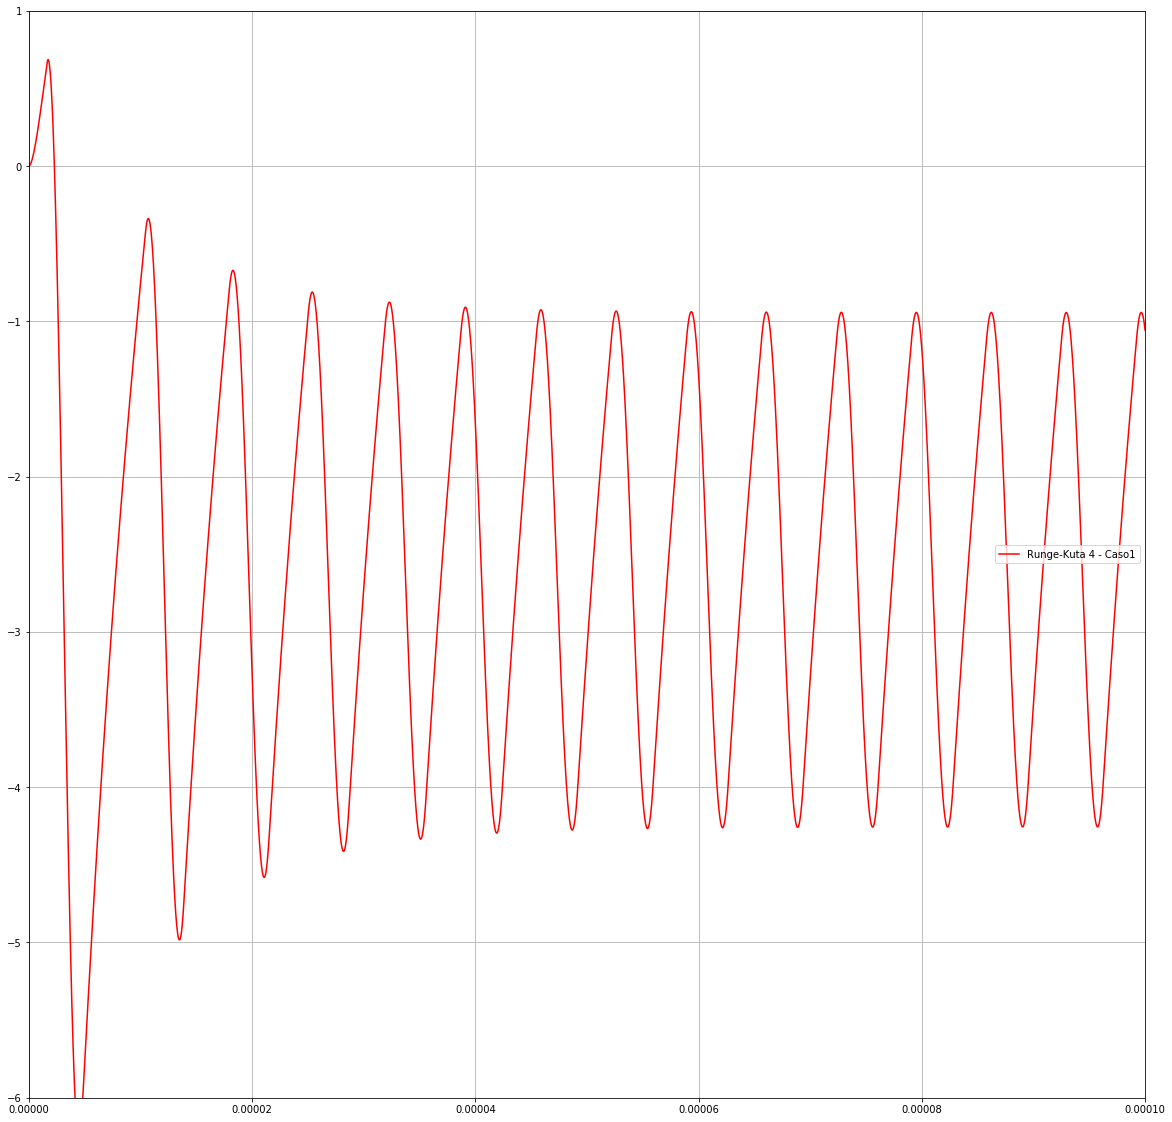

In [274]:
#Grafica v_CE(t) con respecto al tiempo

x3_data = arrFinal_rk4[3]
y3_data = arrFinal_rk4[0]

x4_data = arrFinal_rk4[0]
y4_data = arrFinal_rk4[1]



plt.figure(figsize=(20,20))
#plt.plot(x2_data, y2_data, 'b')
plt.plot(x3_data, y3_data, 'r', label= "Runge-Kuta 4 - Caso1")
#plt.plot(x4_data, y4_data, 'b', label= "Runge-Kutta-Explicito-Orden 4")

plt.legend(loc="center right")

#plt.axhline(y=0, xmin=0, xmax =1)
#plt.axvline(x=0, ymin=0, ymax =1)
plt.ylim(-6,1)
plt.xlim(0,0.0001)

plt.grid()
plt.show()

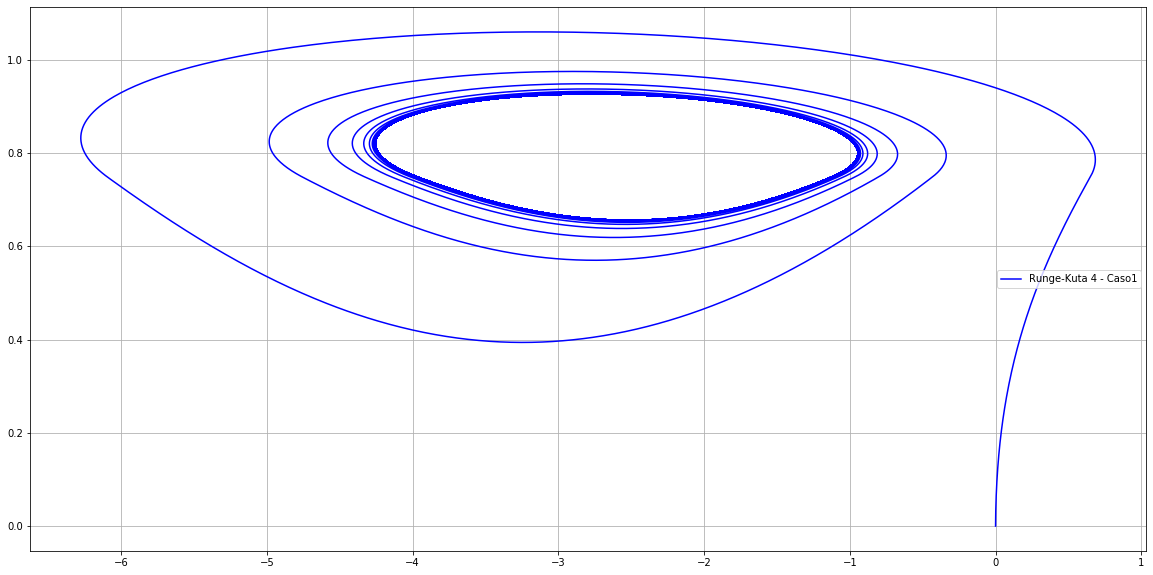

In [272]:
#Grafica comparativa de v_CE(t) y v_BE(t)

x3_data = arrFinal_rk4[3]
y3_data = arrFinal_rk4[0]

x4_data = arrFinal_rk4[0]
y4_data = arrFinal_rk4[1]



plt.figure(figsize=(20,10))
#plt.plot(x2_data, y2_data, 'b')
#plt.plot(x3_data, y3_data, 'r', label= "Runge-Kutta-Explicito-Orden 4")
plt.plot(x4_data, y4_data, 'b', label= "Runge-Kuta 4 - Caso1")

plt.legend(loc="center right")

#plt.axhline(y=0, xmin=0, xmax =1)
#plt.axvline(x=0, ymin=0, ymax =1)
#plt.ylim(-15,10)
#plt.xlim(0,0.0002)

plt.grid()
plt.show()

<h1>Caso 2</h1>

In [275]:
def fR(x):
    VTH=0.75 #Volteje Umbral
    RON=100 #Resistencia del Transistor NPN BJT Q Ohms
    if (x<VTH):
        i=0
    else:
        i=(x-VTH)/RON
    return i

def vCC(x):
    VCC=5
    a=x
    if (a < 0):
        i=0
    else:
        i=VCC
    return i

def colpitts(t,x,y,z):
    C1 = 54e-9;
    C2 = 54e-9;
    REE = 400;
    VEE = -5;
    betaF = 200;
    RL = 35;
    L = 98.5e-6;
    
    w1 = (z - betaF*fR(y))/C1;
    w2 = (-(y+VEE)/REE - fR(y) - z)/C2;
    w3 = (vCC(t) - x + y - RL*z)/L;
    
    return [w1, w2, w3]

In [276]:
paso=i=0.00000001
xini=[0,0,0]
w=[0,0,0]

arrFinal_rk4=rkEx4(xini,w, paso)

dt={'Paso':arrFinal_rk4[3], 'Voltaje v_CE(t)':arrFinal_rk4[0], 'Voltaje v_BE(t)':arrFinal_rk4[1], 'Corriente i_L(t)':arrFinal_rk4[2]}
data=pd.DataFrame(dt, columns=['Paso', 'Voltaje v_CE(t)', 'Voltaje v_BE(t)', 'Corriente i_L(t)'])
display(data.head(20))

,Paso,Voltaje v_CE(t),Voltaje v_BE(t),Corriente i_L(t)
0,0.000000e+00,0.000000,0.000000,0.000000
1,1.000000e-08,0.000054,0.002260,0.000507
2,2.000000e-08,0.000202,0.004426,0.001012
3,3.000000e-08,0.000444,0.006497,0.001515
4,4.000000e-08,0.000778,0.008474,0.002017
5,5.000000e-08,0.001206,0.010357,0.002517
6,6.000000e-08,0.001726,0.012147,0.003016
7,7.000000e-08,0.002338,0.013844,0.003513
8,8.000000e-08,0.003042,0.015448,0.004008
9,9.000000e-08,0.003838,0.016959,0.004501


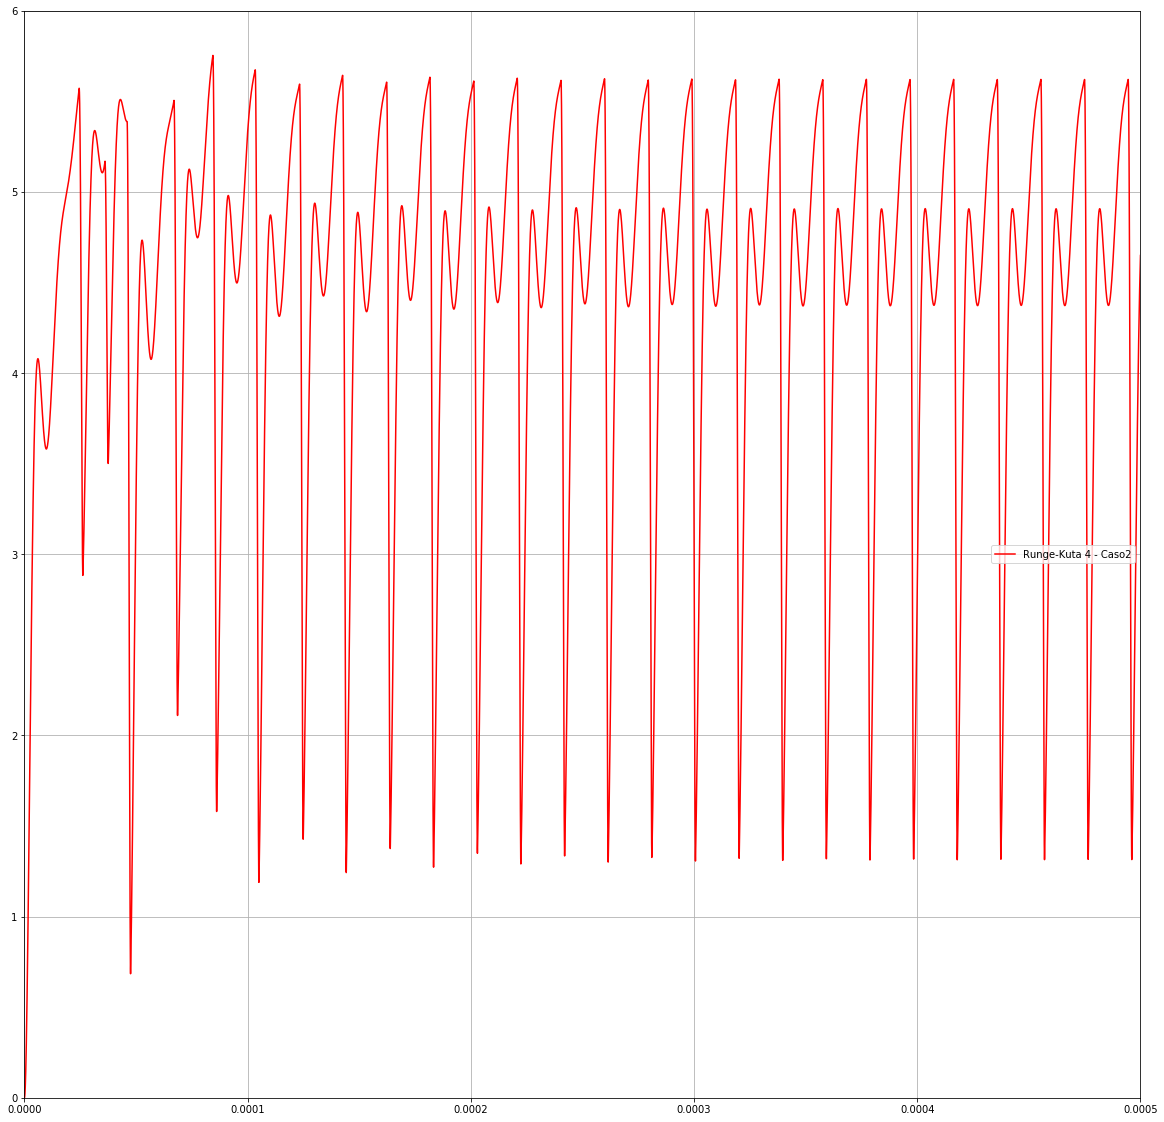

In [283]:
#Grafica v_CE(t) con respecto al tiempo

x3_data = arrFinal_rk4[3]
y3_data = arrFinal_rk4[0]

x4_data = arrFinal_rk4[0]
y4_data = arrFinal_rk4[1]



plt.figure(figsize=(20,20))
#plt.plot(x2_data, y2_data, 'b')
plt.plot(x3_data, y3_data, 'r', label= "Runge-Kuta 4 - Caso2")
#plt.plot(x4_data, y4_data, 'b', label= "Runge-Kutta-Explicito-Orden 4")

plt.legend(loc="center right")

#plt.axhline(y=0, xmin=0, xmax =1)
#plt.axvline(x=0, ymin=0, ymax =1)
plt.ylim(0,6)
plt.xlim(0,0.0005)

plt.grid()
plt.show()

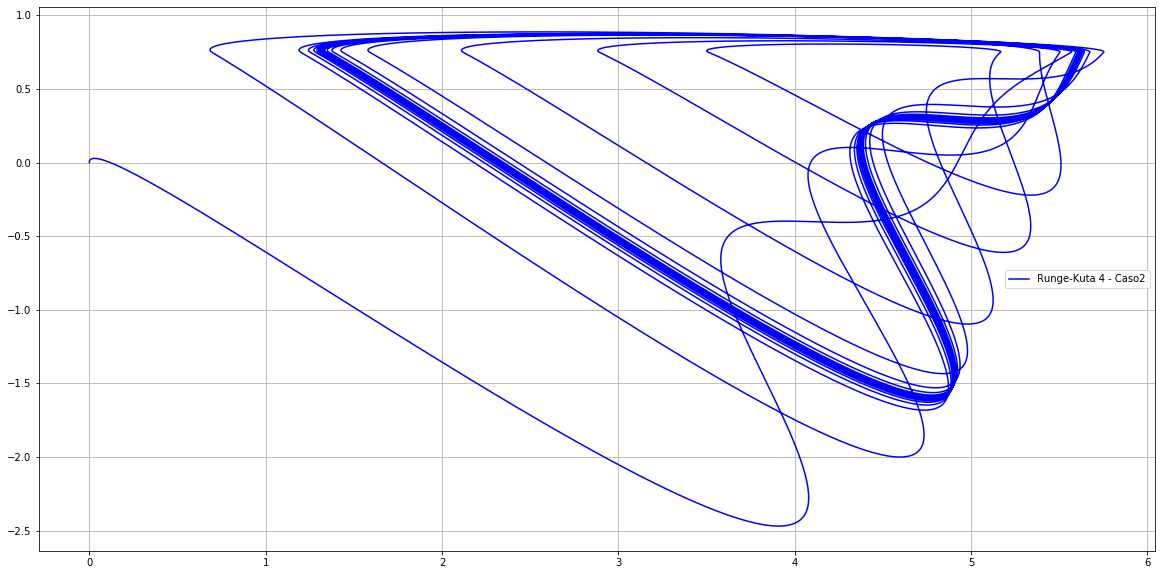

In [284]:
#Grafica comparativa de v_CE(t) y v_BE(t)

x3_data = arrFinal_rk4[3]
y3_data = arrFinal_rk4[0]

x4_data = arrFinal_rk4[0]
y4_data = arrFinal_rk4[1]



plt.figure(figsize=(20,10))
#plt.plot(x2_data, y2_data, 'b')
#plt.plot(x3_data, y3_data, 'r', label= "Runge-Kutta-Explicito-Orden 4")
plt.plot(x4_data, y4_data, 'b', label= "Runge-Kuta 4 - Caso2")

plt.legend(loc="center right")

#plt.axhline(y=0, xmin=0, xmax =1)
#plt.axvline(x=0, ymin=0, ymax =1)
#plt.ylim(-15,10)
#plt.xlim(0,0.0002)

plt.grid()
plt.show()